In [ ]:
%cd motionmapperpyOther

!python setup.py install

%cd ..

In [ ]:
%load_ext autoreload
%autoreload 2

In [507]:
import pandas as pd
import numpy as np
import pickle 

import glob, os, sys

import time, copy
from datetime import datetime
import hdf5storage

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# from moviepy.editor import VideoClip, VideoFileClip
# from moviepy.video.io.bindings import mplfig_to_npimage

from tqdm import tqdm 

from scipy.ndimage import median_filter

from matplotlib import rc
rc('animation', html='jshtml')

from pythonlib.dataset.dataset import Dataset
from pythonlib.dataset.dataset_preprocess.general import preprocessDat



In [508]:
import motionmapperpy as mmpy

projectPath = 'content/trial1_mmpy'

# This creates a project directory structure which will be used to store all motionmappery pipeline
# related data in one place.

mmpy.createProjectDirectory(projectPath)

Skipping, path already exists : content/trial1_mmpy
Skipping, path already exists : content/trial1_mmpy/Projections
Skipping, path already exists : content/trial1_mmpy/TSNE_Projections
Skipping, path already exists : content/trial1_mmpy/TSNE
Skipping, path already exists : content/trial1_mmpy/UMAP


In [509]:
'''with open('data_032921/Pancho-arc2-formodeling-210329_014648/dat.pkl', 'rb') as f:
    content = pickle.load(f)
content'''

"with open('data_032921/Pancho-arc2-formodeling-210329_014648/dat.pkl', 'rb') as f:\n    content = pickle.load(f)\ncontent"

In [510]:
#content.head()

In [511]:
# animal = "Red"

In [512]:
''''if animal == "Red":
    path_list = [
        "data_032921/Red-lines5-formodeling-210329_005719",
        "data_032921/Red-arc2-formodeling-210329_005550",
        "data_032921/Red-shapes3-formodeling-210329_005200",
        "data_032921/Red-figures89-formodeling-210329_005443"
    ]
elif animal=="Pancho":
    path_list = [
        "data_032921/Pancho-lines5-formodeling-210329_014835",
        "data_032921/Pancho-arc2-formodeling-210329_014648",
        "data_032921/Pancho-shapes3-formodeling-210329_002448",
        "data_032921/Pancho-figures89-formodeling-210329_000418"
    ]
append_list = None

D = Dataset(path_list, append_list)''''

SyntaxError: EOL while scanning string literal (795116304.py, line 17)

In [513]:
expt = 'gridlinecircle'
path_list = [
    "data_030421/Pancho-gridlinecircle-baseline-210824_002447",
    "data_030421/Pancho-gridlinecircle-circletoline-210828_100027",
    "data_030421/Pancho-gridlinecircle-linetocircle-210828_100152",
    "data_030421/Pancho-gridlinecircle-lolli-210903_094051",
]
append_list = None

D = Dataset(path_list, append_list)

----------------
Currently loading: data_030421/Pancho-gridlinecircle-baseline-210824_002447
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': 210820, 'edate': 210821, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'210820': 1, '210821': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['gridlinecircle1', 'gridlinecircle2'], 'T1': [], 'G1': [], 'G2': [], 'G3': [], 'G4': [], 'description': '', 'finalized': False, 'good_expt': True, 'expt': 'gridlinecircle', 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}}, 'filedata_params': {'pix_per_deg': array([[ 26.64621164],
       [-26.64621164]]), 'resolution': (1024, 768), 'animal': 'Pancho', 'basedir': '/data2/anima

In [ ]:
D.Dat

In [ ]:
D.Dat.iloc[150]["strokes_beh"][2]

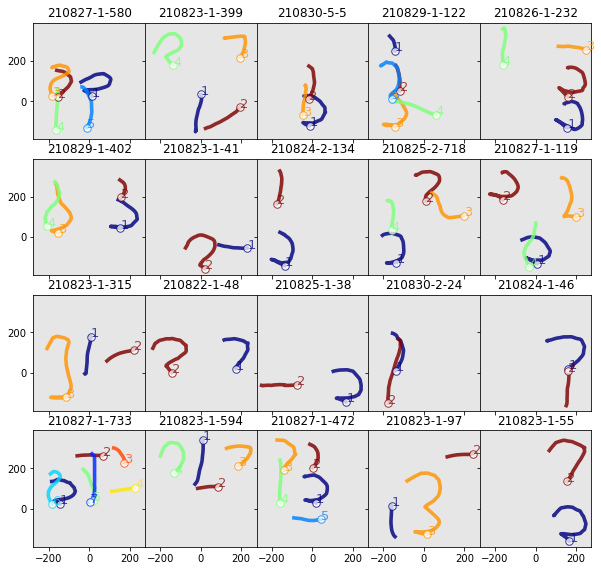

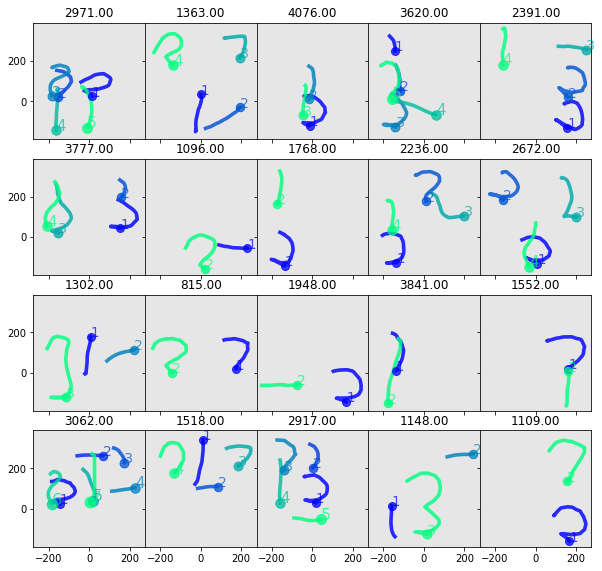

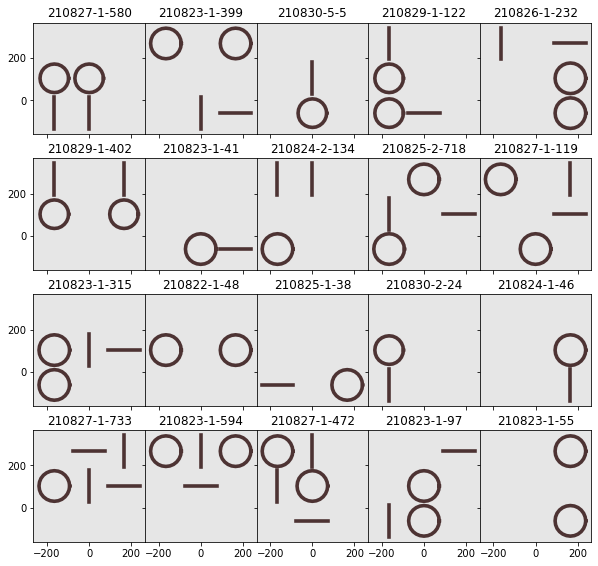

In [514]:
# Plot 20 random trials, showing behavior
k = 20
fig1, idxs = D.plotMultTrials(k, which_strokes="strokes_beh", return_idxs=True);
SDIR = "trialFigs"

fig1.savefig(f"{SDIR}/trialFig1.pdf")

# Plot those same trials, but coloring by order.
# This is useful for seeing the sequencing of the strokes.
strokes_list = [D.Dat.iloc[i]["strokes_beh"] for i in idxs]
D.plotMultStrokesByOrder(strokes_list, titles=idxs);

# Now plot the stimulus images for these same trials.
fig2 = D.plotMultTrials(idxs, which_strokes="strokes_task");

fig2.savefig(f"{SDIR}/trialFig2.pdf")


# There are many flags to modify the plotting in the above functions. There are also many other plotting function
# that operate on Datasets in pythonlib.dataset.plots


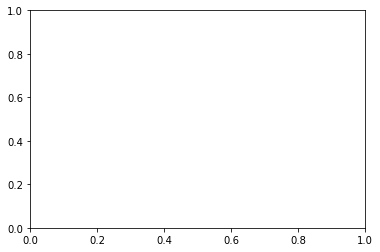

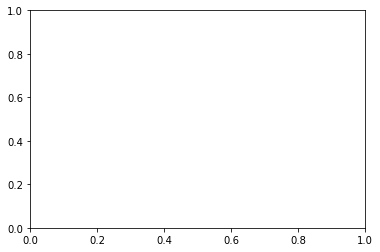

In [515]:
%matplotlib inline

figtmp, axes= plt.subplots()
figtmp

C:\Users\alcec\anaconda3\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x000002208EC1A2E0> has a label of '_line' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)
C:\Users\alcec\anaconda3\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x000002208EC1A2E0> has a label of '_circle' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


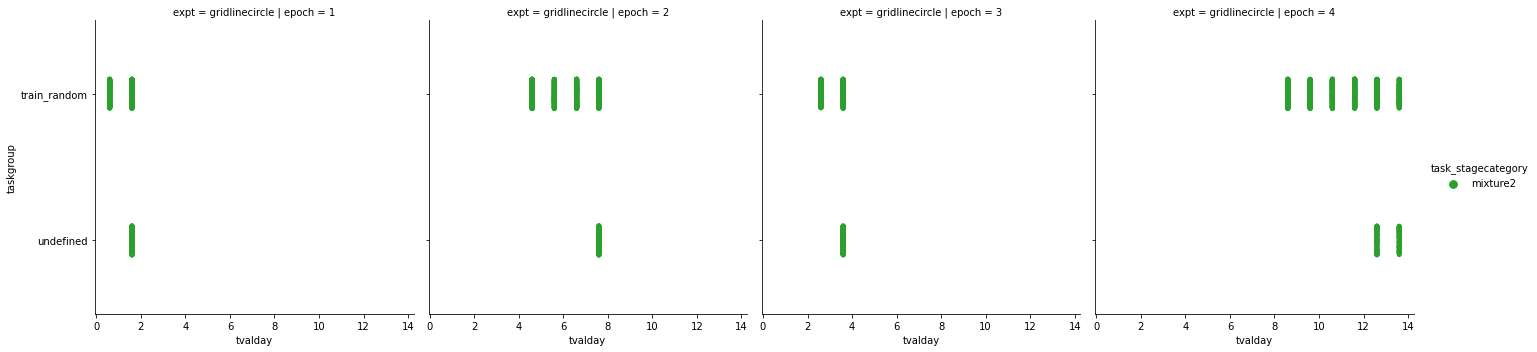

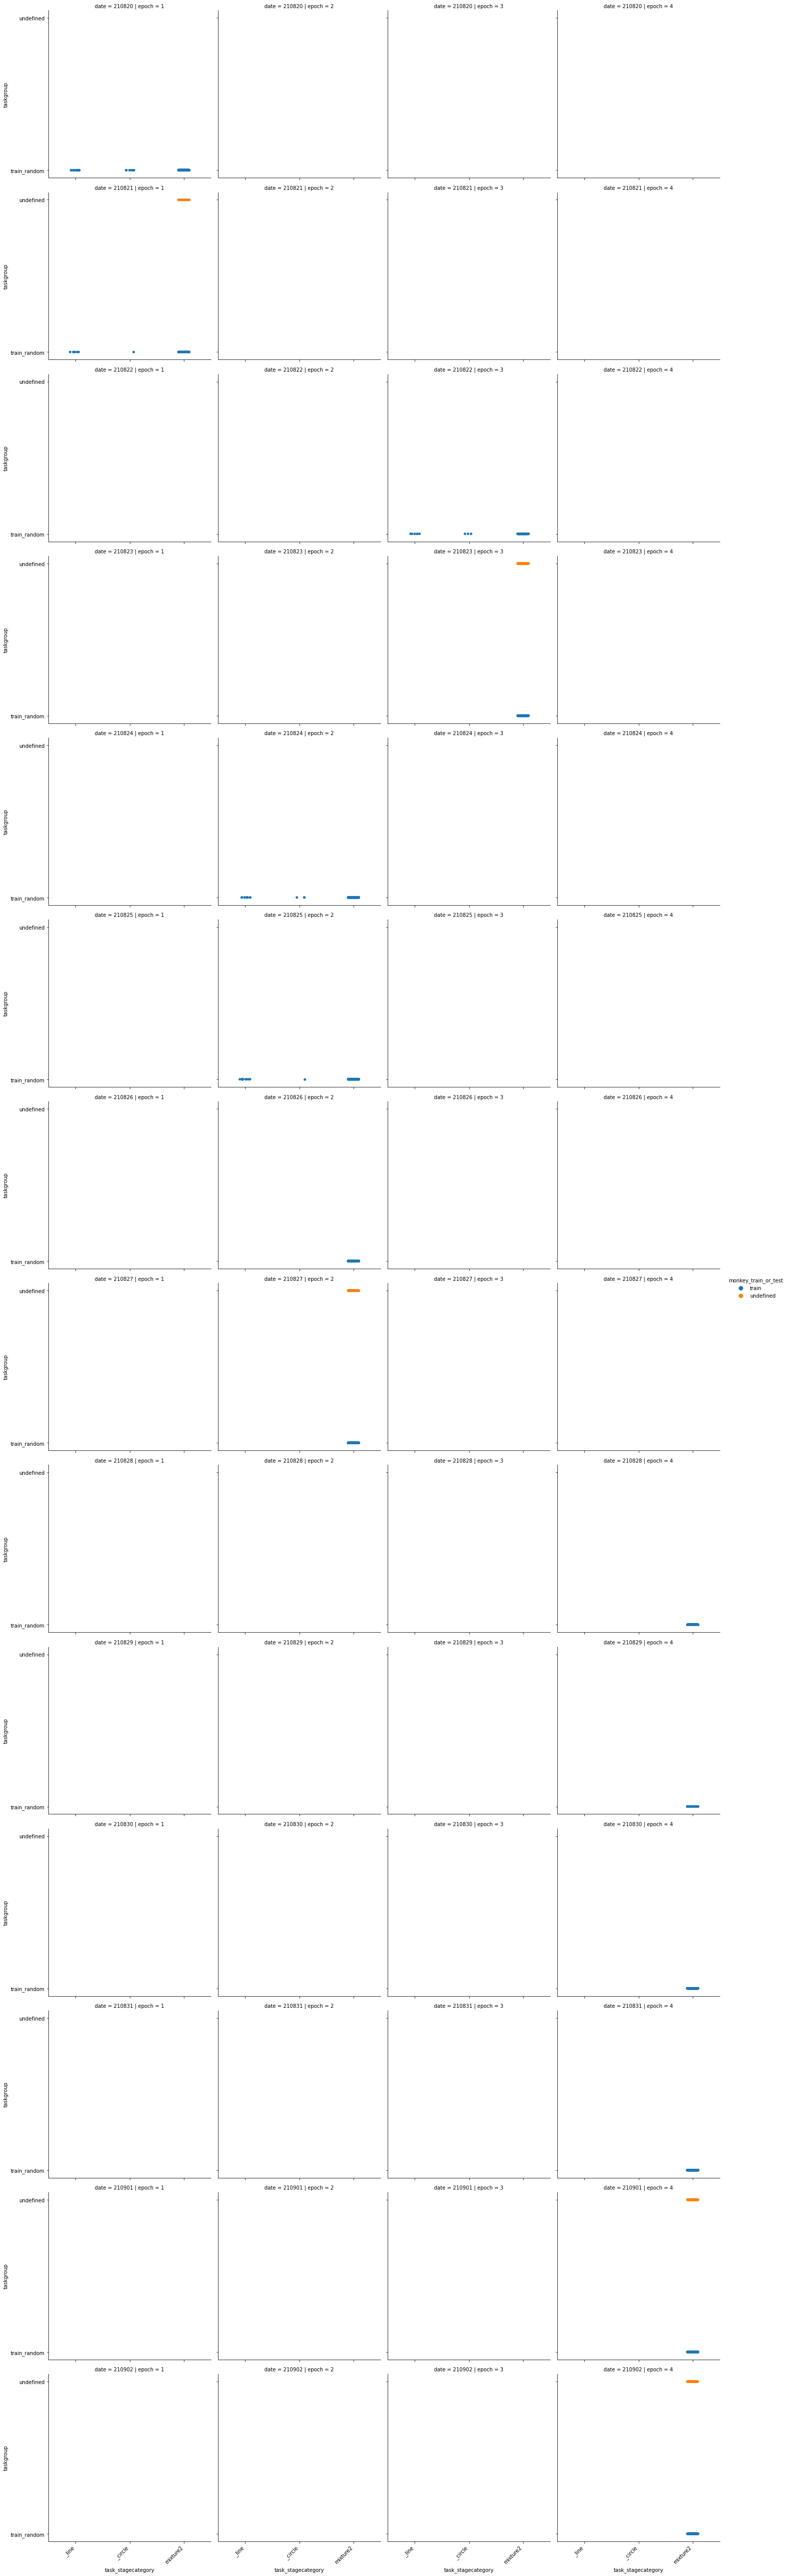

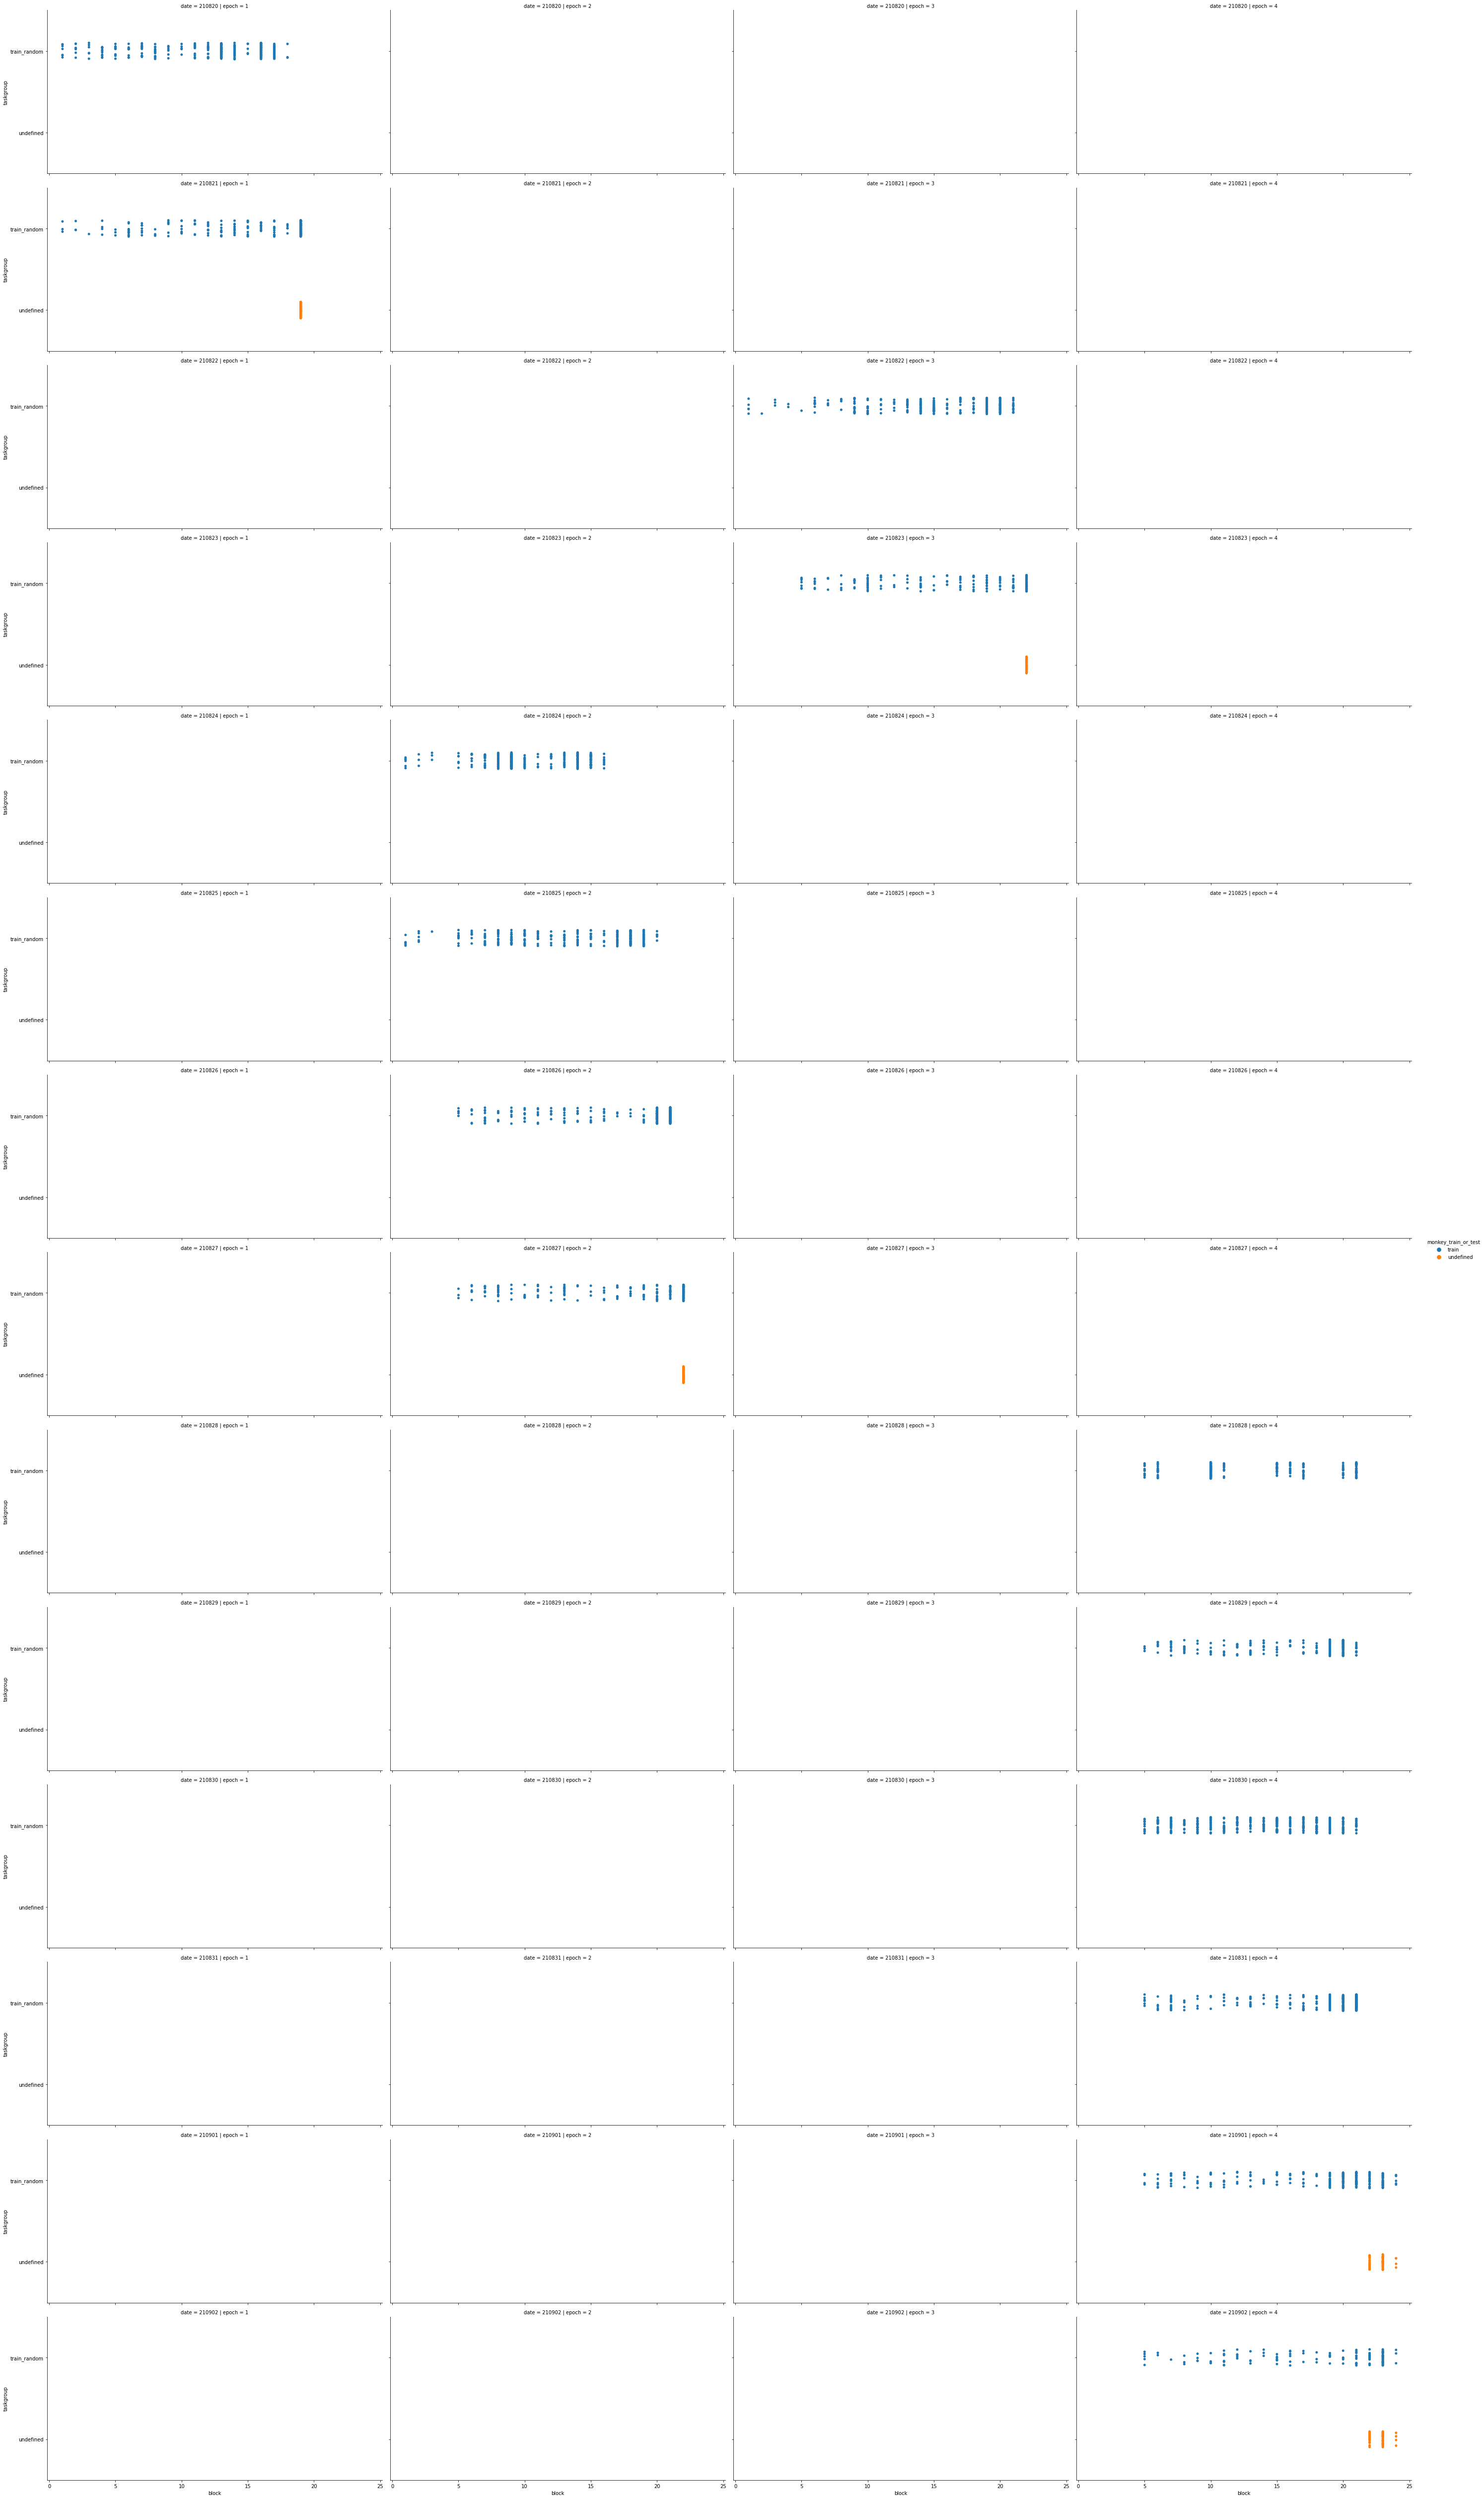

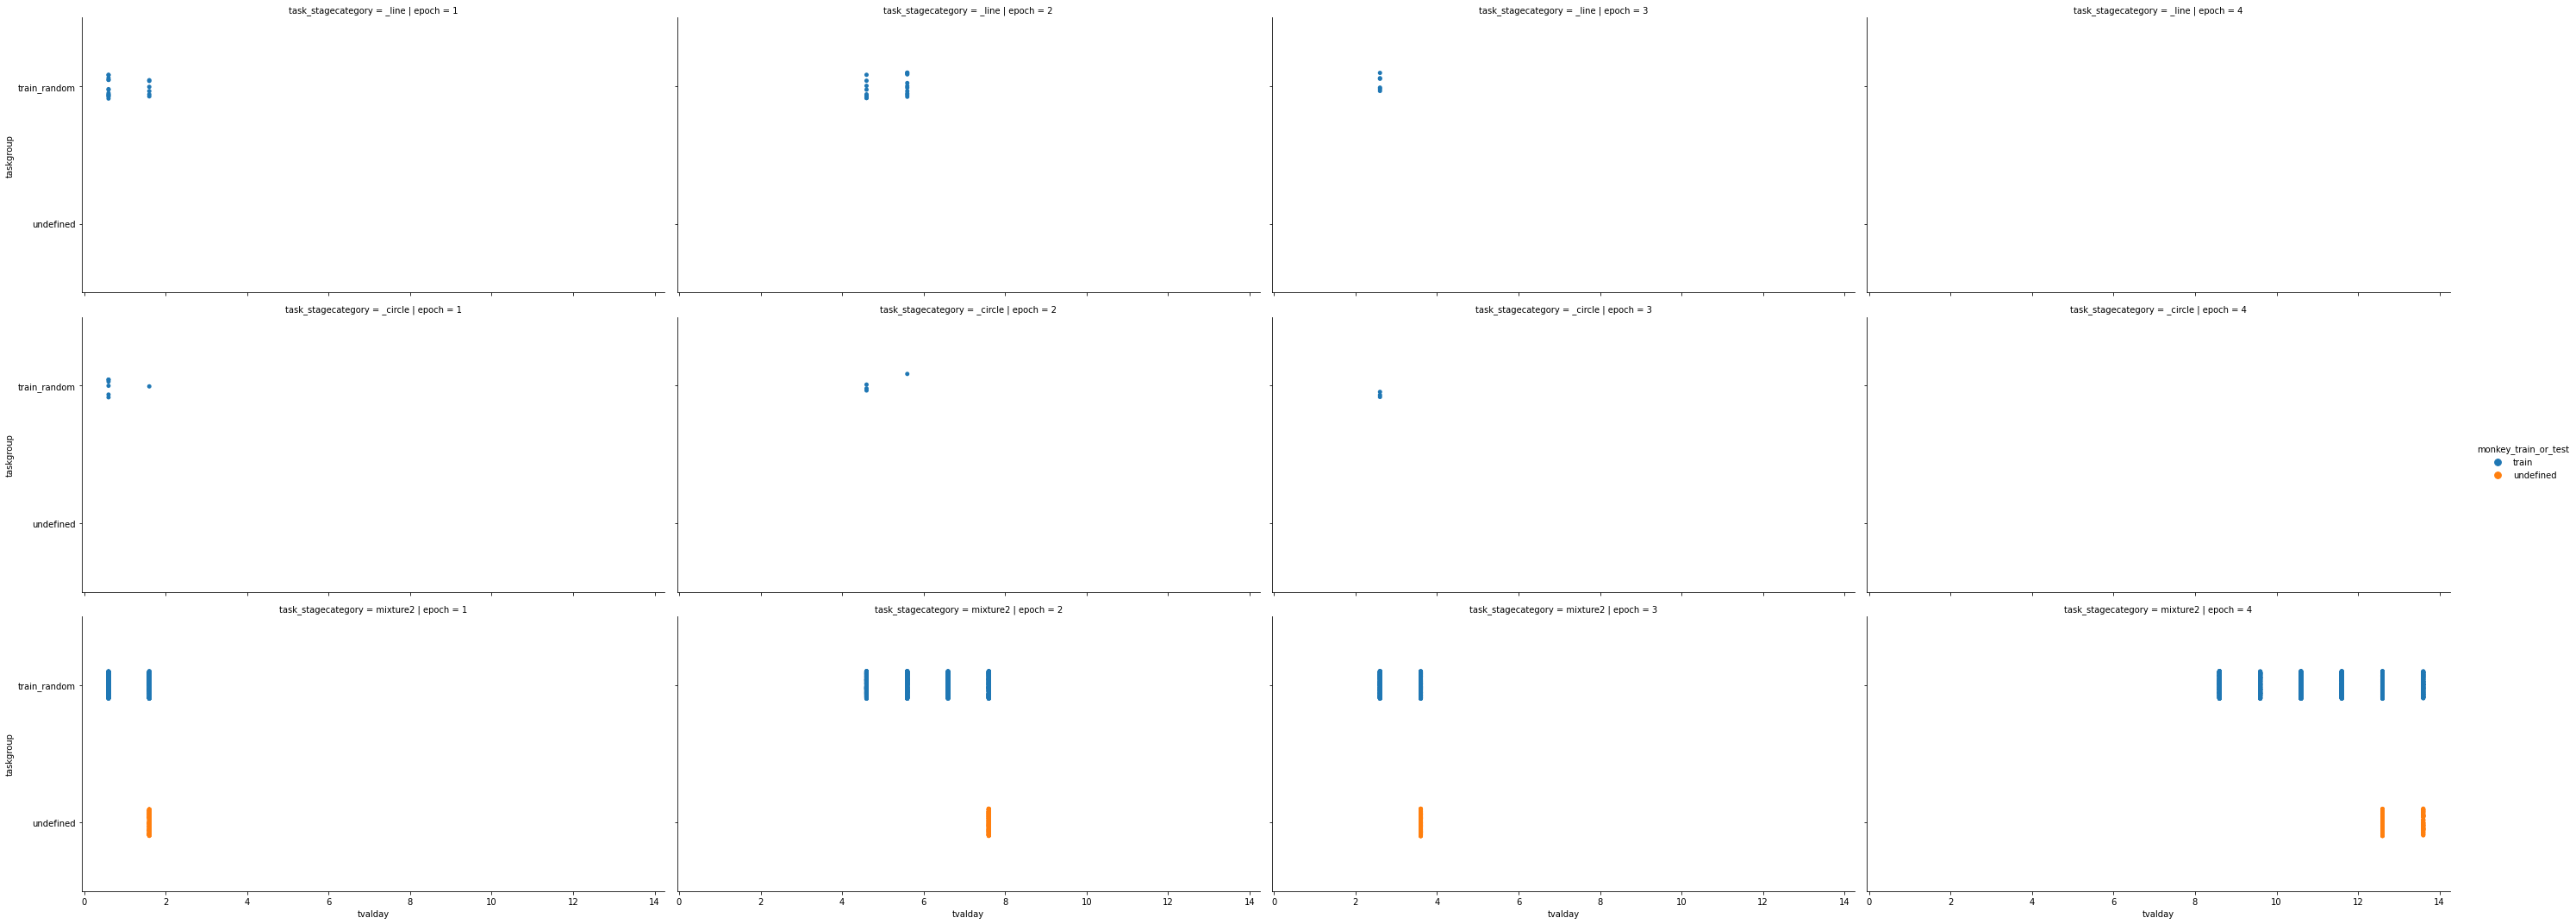

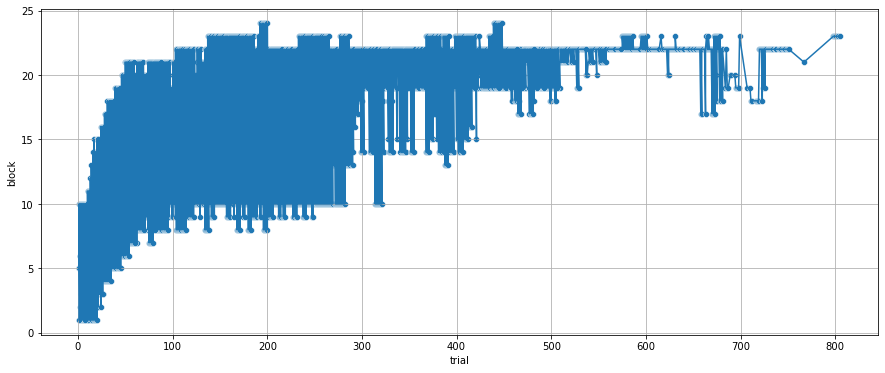

In [516]:
# These are useful plots showing the overview of the experiment.
# There were four epochs in the experiment gridlinecircle:
# 1. baseline
# 2. linetocircle
# 3. circletoline
# 4. lolli.

# More general notes about how experimental timelines work:
## EXPERIEMNTAL STRUCTURE/TIMELINE
# There are two epochs, each epoch having its set of training and tests tasks. 

# Across days, it goes like this:
# Epoch 1 (Train) --> Epoch 1 (Test) --> Epoch 2 (Train) --> Epoch 2 (Test)

# Ideally, you train seprate models for Epochs 1 and 2, since the idea is that the monkey is laerning different

# Priors in the two epochs (Train) then being tested on similar test tasks (Test).

# To visualize the experimental structure:
# notes:
# - tvalday is time of trial. e..g, the first digit is the day, the value after decimal is fraction of day (not
# exactly from midnight to midnight, but within the "experimental session"). so 2.5 means day 1, halfway through the 
# day (from start of expt to end of expt)
# - to get the actual time, see "tval" qwhich is fraction of day from 0:00 to 24:00


figlist = D.plotOverview()

# you might want to save figlist to view, since hard to see in browser.
SDIR = "tmp" # fill this in. e.g, "/tmp"
for i, fig in enumerate(figlist):
    fig.savefig(f"{SDIR}/overview_{i}.pdf")

NameError: name 'j' is not defined

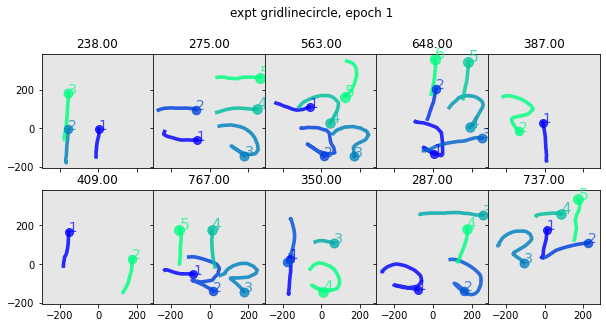

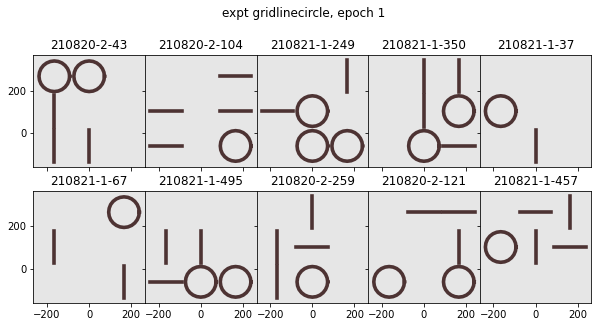

In [517]:
# === Plot random trials, split by experiment and epoch. 
# Note the changes in image structure across expts and epochjs.
import random

SDIR = "splitFigs"
i = 1
k = 10
exptlist = set(D.Dat["expt"])
epochlist = set(D.Dat["epoch"])
for expt in exptlist:
    for epoch in epochlist:
        df = D.Dat[(D.Dat["expt"]==expt) & (D.Dat["epoch"]==epoch)]
        if len(df)==0:
            continue
        inds = random.sample(list(df.index), k)
        
#         fig1 = D.plotMultTrials(inds, which_strokes="strokes_beh")
        strokes_list = [D.Dat.iloc[i]["strokes_beh"] for i in inds]
        fig1,_ = D.plotMultStrokesByOrder(strokes_list, titles=inds);

        fig2 = D.plotMultTrials(inds, which_strokes="strokes_task")
        fig1.suptitle(f"expt {expt}, epoch {epoch}")
        fig2.suptitle(f"expt {expt}, epoch {epoch}")
        
        fig1.savefig(f"{SDIR}/randomSplit_{i}.pdf")
        i = i+1
        fig2.savefig(f"{SDIR}/randomSplit_{j}.pdf")
        j = j+1

    
    '''
        fig = fig1
        fig.savefig(f"{SDIR}/randomSplit{i}.pdf")
        i +=1
        
        fig = fig2
        fig.savefig(f"{SDIR}/randomSplit{i}.pdf")
        i +=1'''
        

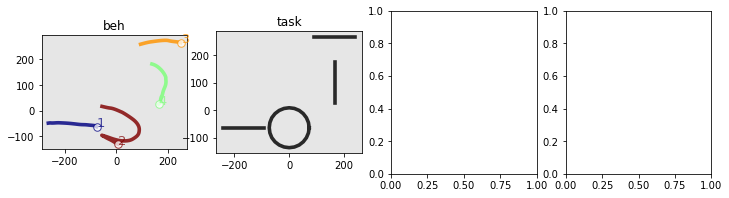

In [518]:
# == Plot a single trial. showing spatial and temporal data
ind = 200
D.plotSingleTrial(ind);

In [ ]:
fig1.savefig(f"{SDIR}/randomSplit_{i}.pdf")


In [ ]:
f"{SDIR}/randomSplit_{i}.pdf"


In [ ]:
fig1

In [ ]:
# Filter to specific task of interest, and plot with overlay behavioral score (hausdorff)
df = D.Dat[(D.Dat["random_task"]==True)]

import random
inds = random.sample(list(df.index), 20)

scores = [D.Dat["hausdorff"].values[i] for i in inds]
D.plotMultTrials(inds, titles=scores);
D.plotMultTrials(inds, titles=scores, which_strokes="strokes_task");

In [ ]:
if False:
    # IGNore for now, not important for most data analyses. just for modeling.
    # recenter tasks (so they are all similar spatial coords)
    D.recenter(method="each_beh_center")

    # interpolate beh (to reduce number of pts)
    D.interpolateStrokes()

    # subsample traisl in a stratified manner to amke sure good represnetaiton
    # of all variety of tasks.
    D.subsampleTrials()

    # Recompute task edges (i..e, bounding box)
    D.recomputeSketchpadEdges()


In [ ]:
########## Ver 1: mix all the data (ignoring what were in same experiments for monkey) and split evenly. 
# Useful if want to train model to capture diversity of behavior
inds_train, inds_val, inds_test = D.splitTrainTest()

In [ ]:
########## Ver 2: Extract train and test tasks exactly as monkey got.
# Do this focusing on a single expeirment and epoch. 
expt = "lines5" 
epoch = 1
inds_train, inds_val, inds_test = D.splitTrainTestMonkey(expt=expt, val = 0.05, epoch=epoch)

In [ ]:
# First pass, try the following experiments and epochs, training four separate models (two animals, two epochs) 
expt = "lines5"
epochlist = [1, 2]
for epoch in epochlist:
    
    # This is new dataset for training a new model.
    inds_train, inds_val, inds_test = D.splitTrainTestMonkey(expt=expt, val = 0.05, epoch=epoch)

In [ ]:
# Use this to print sample size for different groupings of data. 
# - monkey_train_or_test, whether was train or test task for monkey. 
# - expt, experiment
# - epoch, stage within an experiment
# - task_stagecategory, category of image, sort of like an "alphabet" or generative model.
# D.Dat.groupby(["monkey_train_or_test", "expt", "epoch", "task_stagecategory"]).count()
D.Dat.groupby(["monkey_train_or_test", "expt", "epoch"]).count()

In [ ]:
# Plot, separating by train/test split
# == Similar, but split by train ,test, val, to see that
# they should be similar, since they are sampled from same poool.
_, idxs = D.plotMultTrials(inds_train[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")
_, idxs = D.plotMultTrials(inds_val[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")
_, idxs = D.plotMultTrials(inds_test[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")

In [ ]:
# below is for motionmapperpy

In [519]:
parameters = mmpy.setRunParameters()

In [520]:
parameters

{'numProcessors': 12,
 'numPeriods': 25,
 'omega0': 5,
 'samplingFreq': 100,
 'minF': 1,
 'maxF': 50,
 'tSNE_method': 'barnes_hut',
 'perplexity': 32,
 'embedding_batchSize': 20000,
 'maxOptimIter': 100,
 'trainingSetSize': 35000,
 'maxNeighbors': 200,
 'kdNeighbors': 5,
 'training_perplexity': 20,
 'training_numPoints': 10000,
 'minTemplateLength': 1,
 'waveletDecomp': True,
 'useGPU': -1,
 'n_neighbors': 15,
 'train_negative_sample_rate': 5,
 'embed_negative_sample_rate': 1,
 'min_dist': 0.1,
 'umap_output_dims': 2,
 'n_training_epochs': 1000,
 'rescale_max': 100,
 'method': 'TSNE'}

In [521]:
# %%%%%%% PARAMETERS TO CHANGE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# These need to be revised everytime you are working with a new dataset. #

parameters.projectPath = '1test_monkey/content/trial_mmpy' #% Full path to the project directory.


#parameters.method = 'UMAP' #% We can choose between 'TSNE' or 'UMAP'

parameters.minF = 1        #% Minimum frequency for Morlet Wavelet Transform

parameters.maxF = 50       #% Maximum frequency for Morlet Wavelet Transform,
                           #% usually equal to the Nyquist frequency for your
                           #% measurements.

parameters.samplingFreq = 100    #% Sampling frequency (or FPS) of data.

parameters.numPeriods = 25       #% No. of dyadically spaced frequencies to
                                 #% calculate between minF and maxF.

#parameters.pcaModes = comps_above_thresh #% Number of low-d features.

parameters.numProcessors = -1     #% No. of processor to use when parallel
                                 #% processing for wavelet calculation (if not using GPU)  
                                 #% and for re-embedding. -1 to use all cores 
                                 #% available.

parameters.useGPU = -1           #% GPU to use for wavelet calculation, 
                                 #% set to -1 if GPU not present.

parameters.training_numPoints = 3000    #% Number of points in mini-trainings.


# %%%%% NO NEED TO CHANGE THESE UNLESS MEMORY ERRORS OCCUR %%%%%%%%%%

parameters.trainingSetSize = 5000  #% Total number of training set points to find. 
                                 #% Increase or decrease based on
                                 #% available RAM. For reference, 36k is a 
                                 #% good number with 64GB RAM.

parameters.embedding_batchSize = 30000  #% Lower this if you get a memory error when 
                                        #% re-embedding points on a learned map.

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [522]:
# %%%%%%% tSNE parameters %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#% can be 'barnes_hut' or 'exact'. We'll use barnes_hut for this tutorial for speed.
parameters.tSNE_method = 'barnes_hut' 

# %2^H (H is the transition entropy)
parameters.perplexity = 32

# %number of neigbors to use when re-embedding
parameters.maxNeighbors = 200

# %local neighborhood definition in training set creation
parameters.kdNeighbors = 5

# %t-SNE training set perplexity
parameters.training_perplexity = 20


In [523]:
D.Dat.iloc[0]["strokes_beh"][0]

array([[ -68.99892105,  232.99942868,    3.024     ],
       [ -68.47908782,  232.74112727,    3.032     ],
       [ -68.35495657,  232.65967892,    3.04      ],
       [ -68.85907325,  232.87034837,    3.048     ],
       [ -69.96414229,  233.38826319,    3.056     ],
       [ -71.40922487,  234.12564283,    3.064     ],
       [ -72.83237897,  234.925318  ,    3.072     ],
       [ -73.94553184,  235.61718046,    3.08      ],
       [ -74.66699145,  236.07599672,    3.088     ],
       [ -75.14771821,  236.2594014 ,    3.096     ],
       [ -75.67997718,  236.21354446,    3.104     ],
       [ -76.53585888,  236.04700723,    3.112     ],
       [ -77.81901805,  235.88564755,    3.12      ],
       [ -79.40725522,  235.82713782,    3.128     ],
       [ -81.01825065,  235.91211752,    3.136     ],
       [ -82.36793676,  236.12057799,    3.144     ],
       [ -83.34206144,  236.39134571,    3.152     ],
       [ -84.09148028,  236.65390617,    3.16      ],
       [ -84.99660267,  236.

In [524]:
len(D.Dat.iloc[0]["strokes_beh"][0])
D.Dat.iloc[0]["strokes_beh"][0][1][0:2]

array([-68.47908782, 232.74112727])

In [525]:
pip install numpy

In [ ]:
D.Dat.iloc[0]["strokes_beh"][0]
# data = ([])
#piece = {[1,2]}
i = 1
#D.Dat.iloc["strokes_beh"][0][0][0:2]


dataOneStroke = D.Dat.iloc[0]["strokes_beh"][0][0][0:2]


for i in range(i,len(D.Dat.iloc[0]["strokes_beh"][0])):
    temp = D.Dat.iloc[0]["strokes_beh"][0][i][0:2]
    dataOneStroke = np.vstack((dataOneStroke,temp))



In [ ]:
len(D.Dat.iloc[5124]["strokes_beh"])

In [ ]:
# x is the trial index there are 5125 trials so x < 5125
x = 0
# y is the stroke index- we dont know how many strokes r there
y = 0
# i is the index of one time frame of one stroke, 
# this index also varies for each trial and stroke
i = 0
ldataOneStroke = np.array([])
ldataOneTrial = np.array([])
ldataTotal = np.array([])
for x in range(i, len(D.Dat)):
    y = 0
    for y in range(y, len(D.Dat.iloc[x]["strokes_beh"])):
        #print(len(D.Dat.iloc[x]["strokes_beh"]))
        i=0
        for i in range(i,len(D.Dat.iloc[x]["strokes_beh"][y])):
            temp = D.Dat.iloc[x]["strokes_beh"][y][i][0:2]
            #print(temp)
            ldataOneStroke = np.append(ldataOneStroke,temp)
        #dataOneStroke = np.array(ldataOneStroke)
        #print(ldataOneStroke)
        ldataOneTrial = np.append(ldataOneTrial,dataOneStroke)
    #dataOneTrial = np.array(ldataOneTrial)
    ldataTotal = np.append(ldataTotal,dataOneTrial)
    #dataOneTrial = np.vstack((dataOneTrial, dataOneStroke))
#dataTotal = np.array(ldataTotal)


In [ ]:
len(D.Dat.iloc[105]["strokes_beh"])

In [ ]:
D.Dat.iloc[0]["strokes_beh"][0]

In [308]:
dataOneStroke

array([[ -68.99892105,  232.99942868],
       [ -68.47908782,  232.74112727],
       [ -68.35495657,  232.65967892],
       [ -68.85907325,  232.87034837],
       [ -69.96414229,  233.38826319],
       [ -71.40922487,  234.12564283],
       [ -72.83237897,  234.925318  ],
       [ -73.94553184,  235.61718046],
       [ -74.66699145,  236.07599672],
       [ -75.14771821,  236.2594014 ],
       [ -75.67997718,  236.21354446],
       [ -76.53585888,  236.04700723],
       [ -77.81901805,  235.88564755],
       [ -79.40725522,  235.82713782],
       [ -81.01825065,  235.91211752],
       [ -82.36793676,  236.12057799],
       [ -83.34206144,  236.39134571],
       [ -84.09148028,  236.65390617],
       [ -84.99660267,  236.85849681],
       [ -86.50984863,  236.99305318],
       [ -88.94605737,  237.08238909],
       [ -92.31923411,  237.17264903],
       [ -96.3052052 ,  237.30937859],
       [-100.35217979,  237.51871006],
       [-103.89250933,  237.79835067],
       [-106.56220189,  2

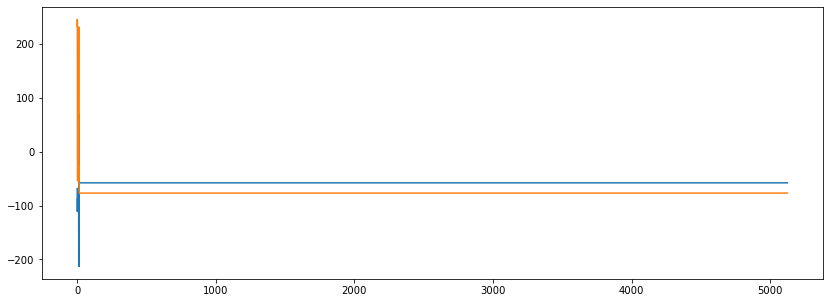

In [356]:
# you dont know if there is more than one stroke in the
# D.Dat.iloc[x]["strokes_beh"][y]
# x is the trial index
# y is the stroke index
plt.figure(figsize=(14,5))
plt.plot(dataTotal)



In [77]:
onestroke

[array([[ -68.99892105,  232.99942868,    3.024     ],
        [ -68.47908782,  232.74112727,    3.032     ],
        [ -68.35495657,  232.65967892,    3.04      ],
        [ -68.85907325,  232.87034837,    3.048     ],
        [ -69.96414229,  233.38826319,    3.056     ],
        [ -71.40922487,  234.12564283,    3.064     ],
        [ -72.83237897,  234.925318  ,    3.072     ],
        [ -73.94553184,  235.61718046,    3.08      ],
        [ -74.66699145,  236.07599672,    3.088     ],
        [ -75.14771821,  236.2594014 ,    3.096     ],
        [ -75.67997718,  236.21354446,    3.104     ],
        [ -76.53585888,  236.04700723,    3.112     ],
        [ -77.81901805,  235.88564755,    3.12      ],
        [ -79.40725522,  235.82713782,    3.128     ],
        [ -81.01825065,  235.91211752,    3.136     ],
        [ -82.36793676,  236.12057799,    3.144     ],
        [ -83.34206144,  236.39134571,    3.152     ],
        [ -84.09148028,  236.65390617,    3.16      ],
        [ 